In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data() # we are loading a keras dataset 

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
len(X_train)

60000

In [26]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [27]:
X_train[0].shape

(28, 28)

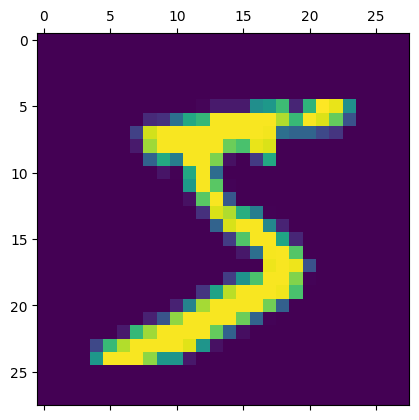

In [28]:
plt.matshow(X_train[0])

In [29]:
X_train = X_train/255 # scalling our dataset to put all values b/w 0 and 1, we divide it with 255 because our highest value of each pixel or feature is 255
X_test = X_test/255

In [30]:
X_train_flatten = X_train.reshape(len(X_train), (28*28)) # reshapping the grid of 28 x 28 to a single array of 784

In [31]:
X_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X_test_flatten = X_test.reshape(len(X_test), (28*28))

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [34]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
X_train_flatten.shape

(60000, 784)

In [36]:
X_test_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid') # neural network layers - output layer of 10 neurons because we have 10 classes to divide b/w 0-9(in short words our ans lies b/w 0-9 numbers) and input laayer of 786 because each digit has 786 features
    # the activation fuction is nothing but which function to use of the model building
])

model.compile( # we have to compile our neural network models before fitting it through data
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flatten, y_train, epochs= 5) # epochs here are number of iterations we wanna perform

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4668 - accuracy: 0.8795
Epoch 2/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 967us/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 943us/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 919us/step - loss: 0.2668 - accuracy: 0.9253


In [38]:
model.evaluate(X_test_flatten, y_test) # predicitng the score of our model through test data

313/313 [==============================] - 0s 818us/step - loss: 0.2657 - accuracy: 0.9271


[0.265667200088501, 0.9271000027656555]

In [39]:
model.predict(X_test_flatten)

313/313 [==============================] - 0s 755us/step


array([[2.31543928e-02, 2.93729187e-07, 4.42812853e-02, ...,
        9.99742806e-01, 1.01060890e-01, 6.33751512e-01],
       [4.57194299e-01, 4.75068670e-03, 9.99658465e-01, ...,
        6.86844733e-13, 1.35398790e-01, 2.47440846e-09],
       [4.73373744e-04, 9.92429912e-01, 6.83005035e-01, ...,
        1.31328270e-01, 3.52867007e-01, 5.24799526e-02],
       ...,
       [3.24247753e-06, 4.15154091e-06, 9.08119313e-04, ...,
        2.18964368e-01, 4.66420710e-01, 7.66243458e-01],
       [1.45416110e-04, 1.81879499e-04, 1.93836691e-04, ...,
        3.33954558e-05, 6.01184785e-01, 1.03240745e-04],
       [9.86203458e-03, 2.59549687e-10, 1.46596476e-01, ...,
        1.95950722e-08, 1.21586752e-04, 4.60889964e-07]], dtype=float32)

In [40]:
model.predict(X_test_flatten[0])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_1/BiasAdd' defined at (most recent call last):
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\nitis\AppData\Local\Temp\ipykernel_3376\619268252.py", line 1, in <cell line: 1>
      model.predict(X_test_flatten[0])
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\core\dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'sequential_1/dense_1/BiasAdd'
In[0] and In[1] has different ndims: [32] vs. [784,10]
	 [[{{node sequential_1/dense_1/BiasAdd}}]] [Op:__inference_predict_function_86950]

In [41]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 676us/step


In [42]:
y_predicted[0] # this gives us ten values the ten values belong to all ten output neuron we made which every neuron holds the higher value that is the answer

array([2.3154393e-02, 2.9372919e-07, 4.4281285e-02, 9.6351099e-01,
       1.6973297e-03, 1.2218580e-01, 1.9067274e-06, 9.9974281e-01,
       1.0106089e-01, 6.3375151e-01], dtype=float32)

In [43]:
np.argmax(y_predicted[0])

7

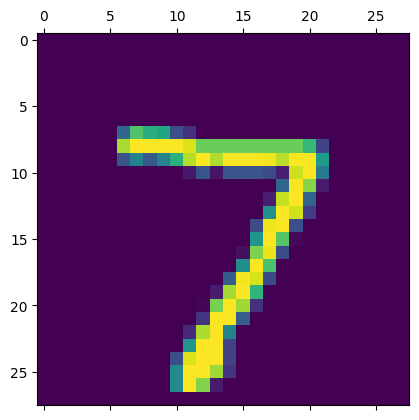

In [44]:
plt.matshow(X_test[0])

In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    6,    4,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,    7,  937,   16,    8,    5,   11,   10,   31,    4],
       [   4,    0,   21,  922,    0,   24,    2,   11,   19,    7],
       [   1,    1,    3,    2,  910,    0,   12,    4,   10,   39],
       [   7,    3,    3,   33,    6,  789,   14,    5,   25,    7],
       [  11,    3,    8,    1,    7,   17,  908,    2,    1,    0],
       [   1,    5,   21,    7,    3,    0,    0,  963,    2,   26],
       [   8,   10,    7,   28,    9,   39,    9,   12,  844,    8],
       [  11,    7,    1,   10,   20,    8,    0,   28,    5,  919]])>

Text(95.72222222222221, 0.5, 'truth')

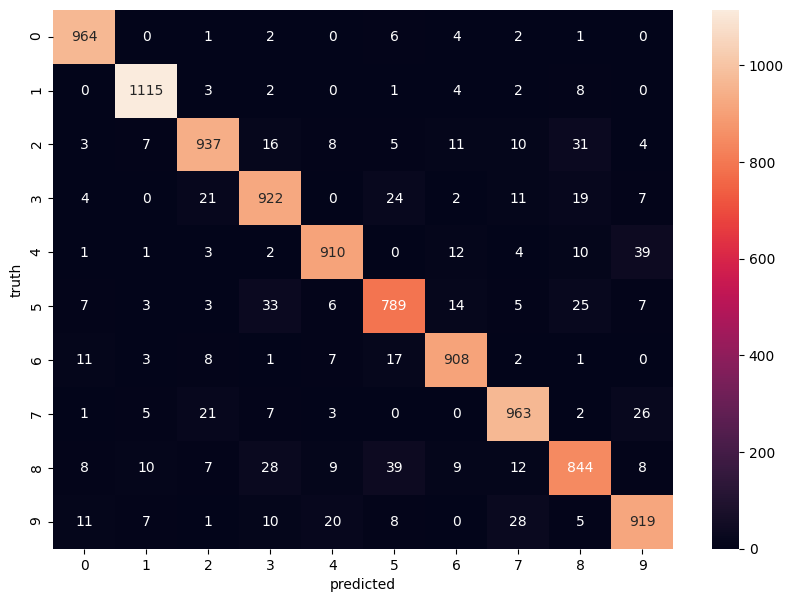

In [47]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')


In [56]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'), # adding a hidden layer of 100 neurons in between input and output layer
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flatten, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2705 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1223 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0655 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0518 - accuracy: 0.9839


In [54]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 931us/step - loss: 0.0822 - accuracy: 0.9745


[0.08218368142843246, 0.9745000004768372]

313/313 [==============================] - 0s 809us/step


Text(95.72222222222221, 0.5, 'truth')

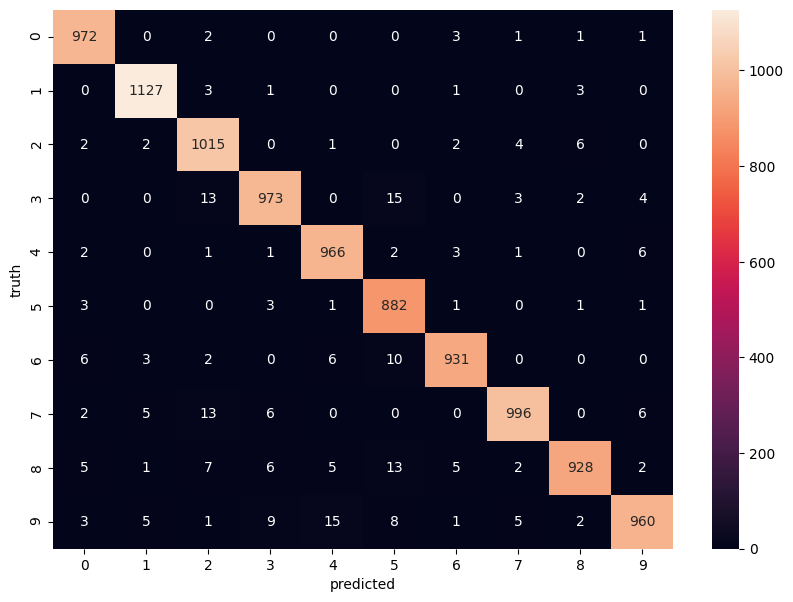

In [50]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # adding a flatten layer which will flatten our grid data to array as we dont have to do it in the beginning
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2783 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1260 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0888 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0669 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0527 - accuracy: 0.9834


In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9684


[0.10031364858150482, 0.9684000015258789]